# Estimating Gains from node values dataset

This notebook shows how to estimate the gain $\alpha_{i|j}$
for each arrow $\underline{x}_j\rightarrow \underline{x}_i$ in the DAG. The estimation algorithm requires as input
a file which contains a dataset with the node names as column labels,
and with instances of the node values as rows.

The input dataset column labels must include ALL node names, and nothing
else, but these column labels need not be in topological order (as they
are in self.ord_nodes).

A list of hidden nodes is an argument of the class constructor with None 
    as default value. Columns of
the input dataset corresponding to hidden nodes will be ignored. Hence,
these column entries can be any number. Correlations 
$\langle\underline{a},\underline{b}\rangle$
where $\underline{a}$ or $\underline{b}$ is a hidden node will be expressed symbolically; otherwise,
they will be expressed numerically.



In [1]:
# this makes sure it starts looking for things from the scumpy folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\scumpy


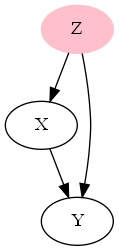

In [2]:
# create Graph from dot file and draw it
from Graph import *
dot_path = 'dot_atlas/good_bad_trols_G1.dot'
graph = Graph(dot_path)
graph.draw(jupyter=True)

In [3]:
# generate synthetic dataset
from RandomDataMaker import *
import pandas as pd
dim = graph.num_nds
sig_eps = [0.1]*dim
dmaker = RandomDataMaker(graph, sig_eps=sig_eps)
num_rows = 1000
data_path = "test_data.csv"
dmaker.generate_dataset_csv(num_rows, data_path)
pd.read_csv(data_path)

,Z,X,Y
0,0.967253,0.923011,1.314732
1,1.217311,0.984559,1.277700
2,1.155886,0.876732,1.457991
3,0.846585,0.788814,1.309391
4,0.953579,1.078970,1.511265
...,...,...,...
995,1.072326,0.846027,1.008678
996,1.151633,0.971220,1.181494
997,1.066977,0.923387,1.385088
998,0.892408,0.925428,1.261276


In [4]:
# Calculate numerical estimates for the gains and print them.
# Next to each gain estimate, print true value that was used
# to create the synthetic dataset. For missing arrows, print
# an error metric= the deviation of a gain constraint from zero.

from GainsEstimator import *
gest = GainsEstimator(graph, data_path)
gest.print_gains(true_alp_mat=dmaker.alp_mat)

\begin{array}{l}
\alpha_{\underline{X}|\underline{Z}}= -0.065047,\quad true=-0.083625\\
\alpha_{\underline{Y}|\underline{Z}}= 0.022272,\quad true=-0.001110\\
\alpha_{\underline{Y}|\underline{X}}= 0.259745,\quad true=0.289877
\end{array}

In [6]:
# now suppose "Z" is a hidden node
gest = GainsEstimator(graph, data_path, hidden_nds = ["Z"])
gest.print_gains(true_alp_mat=dmaker.alp_mat)

\begin{array}{l}
\alpha_{\underline{X}|\underline{Z}}= \frac{\left\langle\underline{Z},\underline{X}\right\rangle}{\sigma^2_{\underline{Z}}},\quad true=-0.083625\\
\alpha_{\underline{Y}|\underline{Z}}= \frac{- 0.002725 \left\langle\underline{Z},\underline{X}\right\rangle + 0.01055 \left\langle\underline{Z},\underline{Y}\right\rangle}{- \left\langle\underline{Z},\underline{X}\right\rangle^{2} + 0.01055 \sigma^2_{\underline{Z}}},\quad true=-0.001110\\
\alpha_{\underline{Y}|\underline{X}}= \frac{- \left\langle\underline{Z},\underline{X}\right\rangle \left\langle\underline{Z},\underline{Y}\right\rangle + 0.002725 \sigma^2_{\underline{Z}}}{- \left\langle\underline{Z},\underline{X}\right\rangle^{2} + 0.01055 \sigma^2_{\underline{Z}}},\quad true=0.289877
\end{array}